<a href="https://colab.research.google.com/github/siddhi011/HR-Analytics-Employee-Attrition-Prediction/blob/main/HR_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analytics – Employee Attrition Prediction


In [2]:
import pandas as pd

file_path = '/content/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [4]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


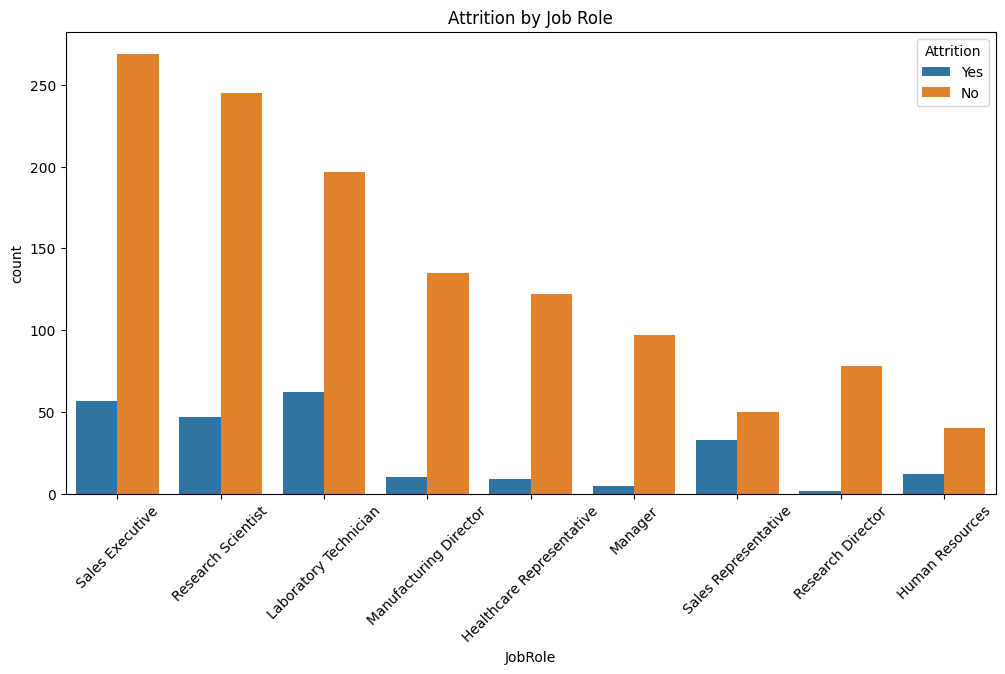

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Attrition by Job Role')
plt.show()

In [6]:
df = df.dropna()
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,1,2,3,61,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,1,4,4,92,2,1,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,1,5,4,56,3,1,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,7,1,40,3,1,...,True,False,False,False,False,False,False,True,False,False


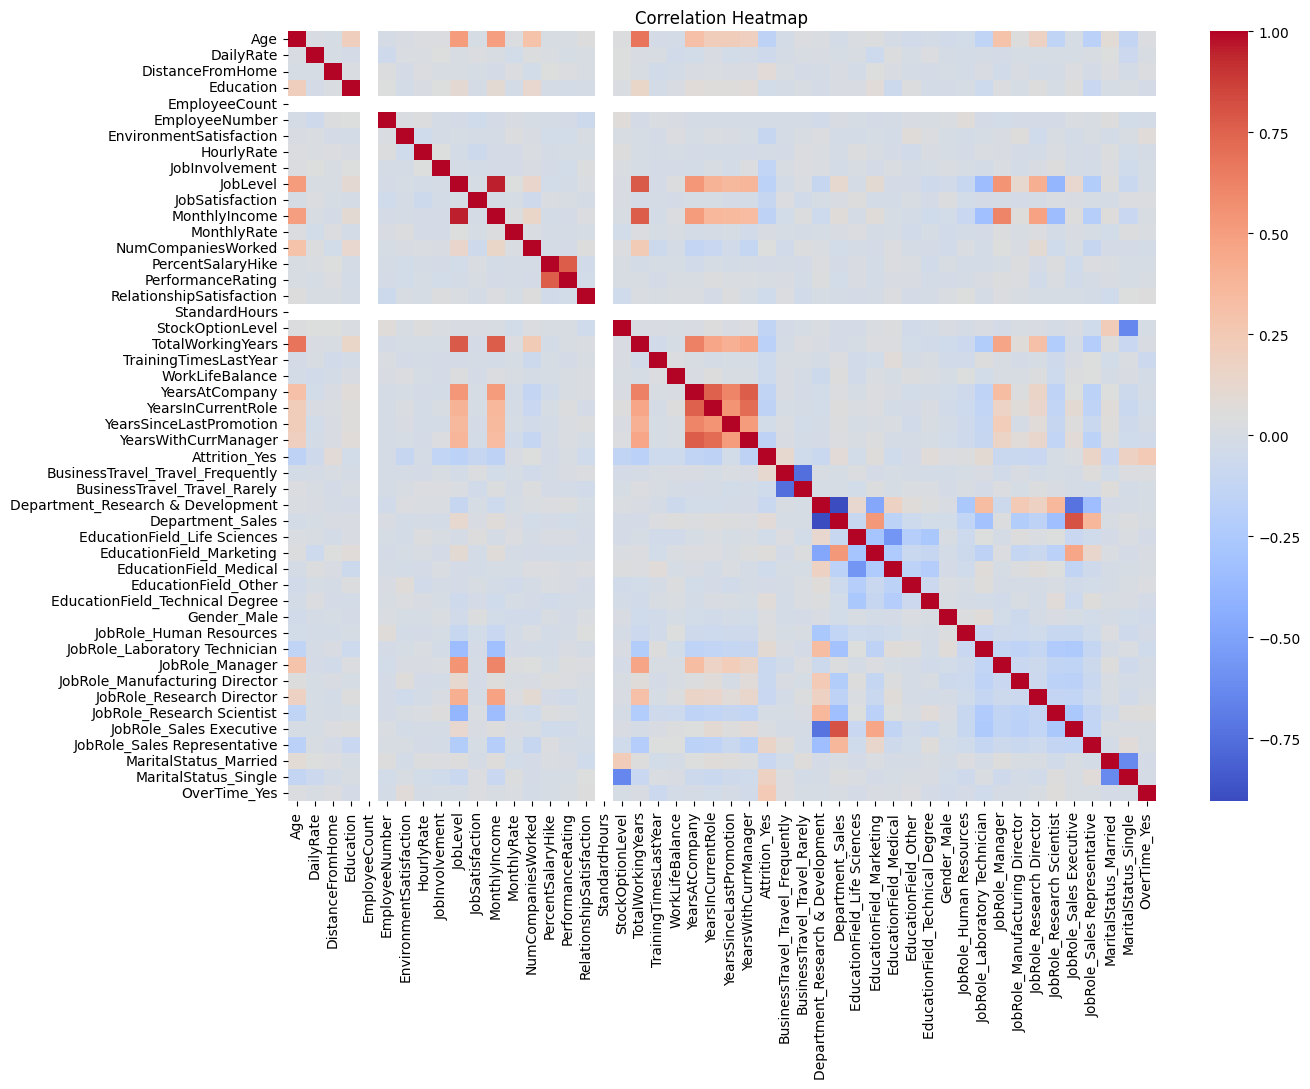

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

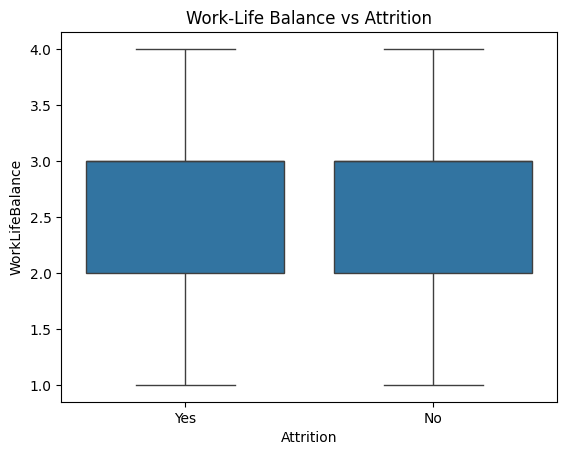

In [8]:
sns.boxplot(x='Attrition', y='WorkLifeBalance', data=df)
plt.title('Work-Life Balance vs Attrition')
plt.show()

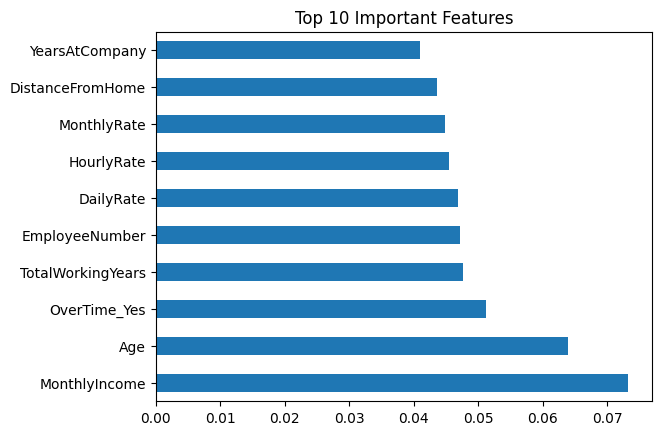

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

In [10]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8684807256235828
              precision    recall  f1-score   support

       False       0.87      0.99      0.93       380
        True       0.64      0.11      0.19        61

    accuracy                           0.87       441
   macro avg       0.76      0.55      0.56       441
weighted avg       0.84      0.87      0.83       441

